In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm

#### 1) Delivery_time -> Predict delivery time using sorting time 

In [87]:
data=pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## EDA

In [3]:
data.shape

(21, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
data[data.duplicated()]

,Delivery Time,Sorting Time


In [8]:
data.shape

(21, 2)

In [9]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


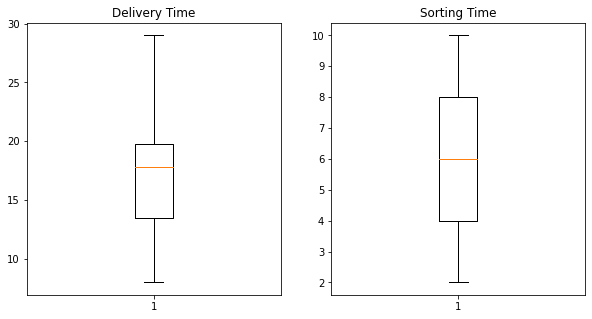

In [10]:
plt.subplots(figsize = (10,5))
plt.subplot(121)
plt.boxplot(data['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(data['Sorting Time'])
plt.title('Sorting Time')
plt.show()


<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

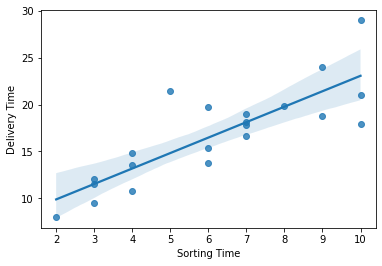

In [11]:
sns.regplot(x=data['Sorting Time'],y=data['Delivery Time'])  

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

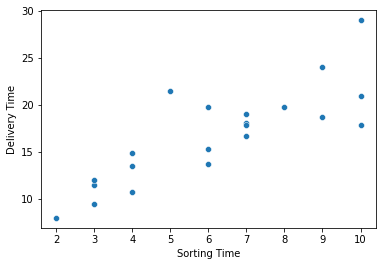

In [12]:
sns.scatterplot(x = data['Sorting Time'], y = data['Delivery Time'])

In [13]:
data.var()

Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

In [14]:
import warnings
warnings.filterwarnings('ignore')

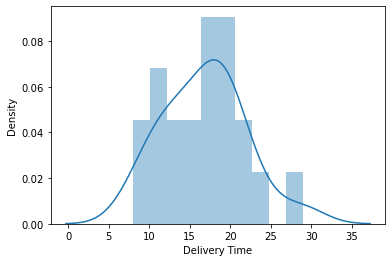

In [15]:
sns.distplot(data['Delivery Time'], bins = 10)
plt.show()

In [16]:
#  The data is skewed,so applying transformation

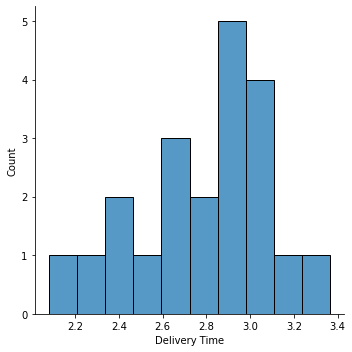

In [17]:
# Log transformation
sns.displot(np.log(data['Delivery Time']), bins = 10)

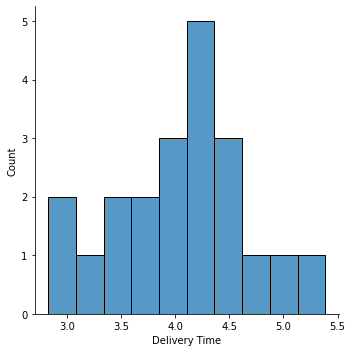

In [18]:
# SQRT transformation
sns.displot(np.sqrt(data['Delivery Time']), bins = 10)

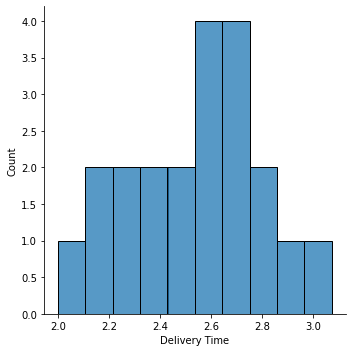

In [19]:
#  cube root transformation
sns.displot(np.cbrt(data['Delivery Time']), bins = 10)

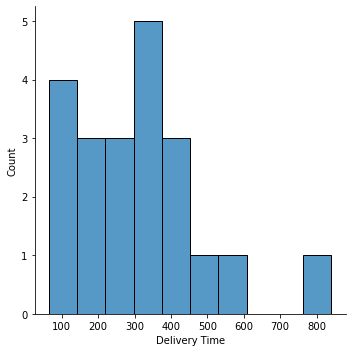

In [88]:
#  Square Transformation
sns.displot(np.square(data['Delivery Time']), bins = 10)

In [56]:
data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


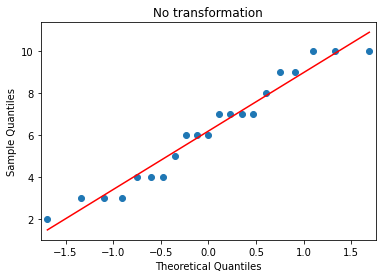

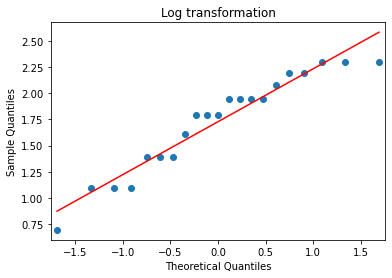

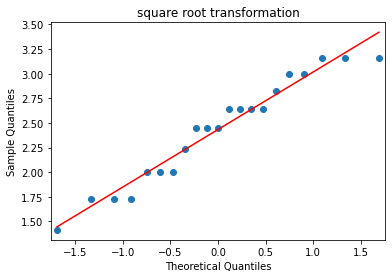

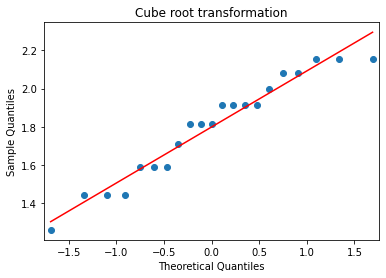

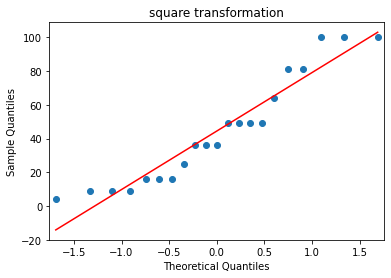

In [85]:
#  Plotting Q-Q Plot
sm.qqplot(data['Sorting_Time'], line = 'r')
plt.title('No transformation')
sm.qqplot(np.log(data['Sorting_Time']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(data['Sorting_Time']), line = 'r')
plt.title('square root transformation')
sm.qqplot(np.cbrt(data['Sorting_Time']), line = 'r')
plt.title('Cube root transformation')
sm.qqplot(np.square(data['Sorting_Time']), line = 'r')
plt.title('square transformation')
plt.show()

## Model Building

In [21]:
import statsmodels.formula.api as smf

In [89]:
data = data.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)

In [90]:
model = smf.ols('Delivery_Time~Sorting_Time', data = data).fit()

In [24]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [25]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

####  Square Root transformation on data

In [26]:
model1 = smf.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)', data = data).fit()


In [27]:
# R square is improve by applying square root
model1.rsquared,model1.rsquared_adj

(0.7292011987544664, 0.7149486302678594)

#### Further applying cube root 

In [28]:
model2 = smf.ols('np.cbrt(Delivery_Time)~np.cbrt(Sorting_Time)', data = data).fit()

In [29]:
#  R square is improve further more by applying cuberoot
model2.rsquared,model2.rsquared_adj

(0.744116757756627, 0.7306492186911864)

#### applying log

In [33]:
model3 = smf.ols('np.log(Delivery_Time)~np.log(Sorting_Time)', data = data).fit()

In [34]:
model3.rsquared,model3.rsquared_adj

(0.77216134926874, 0.7601698413355158)

In [91]:
model4 = smf.ols('np.square(Delivery_Time)~np.square(Sorting_Time)', data = data).fit()

In [92]:
model4.rsquared,model4.rsquared_adj

(0.5881883446986836, 0.566514047051246)

In [93]:
#  model3 is giving best result

In [37]:
# converting values back to normal using np.expm1
pred=np.expm1(model3.predict(data["Sorting_Time"]))
pred

0     21.597360
1     12.070123
2     15.653216
3     20.218593
4     21.597360
5     15.653216
6     17.259981
7     10.005911
8     21.597360
9     20.218593
10    18.776608
11    12.070123
12    17.259981
13    10.005911
14    10.005911
15    12.070123
16    15.653216
17    17.259981
18     7.637887
19    17.259981
20    13.934324
dtype: float64

In [38]:
newdata=pd.DataFrame()
newdata["Delivery_Time"]=data["Delivery_Time"]
newdata["Sorting_Time"]=data["Sorting_Time"]
newdata["prediction"]=pred
newdata

,Delivery_Time,Sorting_Time,prediction
0,21.00,10,21.597360
1,13.50,4,12.070123
2,19.75,6,15.653216
3,24.00,9,20.218593
4,29.00,10,21.597360
5,15.35,6,15.653216
6,19.00,7,17.259981
7,9.50,3,10.005911
8,17.90,10,21.597360
9,18.75,9,20.218593


### 2) Salary_hike -> Build a prediction model for Salary_hike

In [41]:
df=pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [99]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [100]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [103]:
df[df.duplicated()]

,YearsExperience,Salary


In [ ]:
# No null and Duplicate values

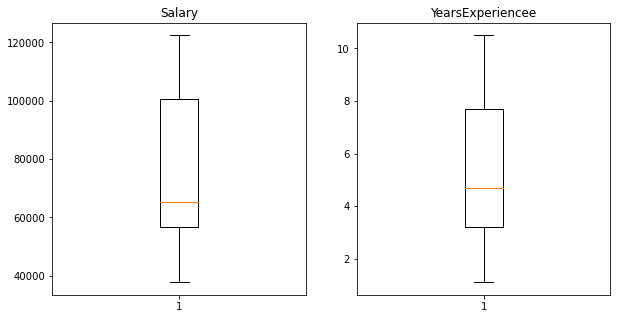

In [104]:
plt.subplots(figsize = (10,5))
plt.subplot(121)
plt.boxplot(df['Salary'])
plt.title('Salary')
plt.subplot(122)
plt.boxplot(df['YearsExperience'])
plt.title('YearsExperiencee')
plt.show()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

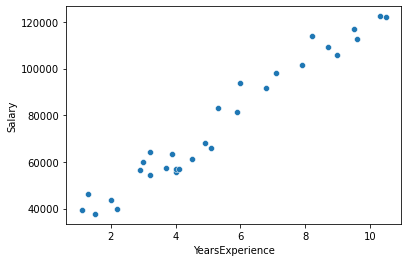

In [43]:
sns.scatterplot(x=df['YearsExperience'],y=df['Salary'])

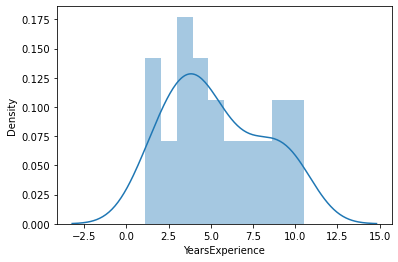

In [44]:
sns.distplot(df['YearsExperience'], bins = 10)
plt.show()

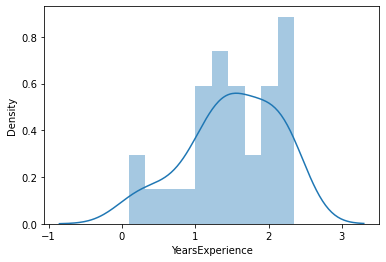

In [58]:
# Data is right Skewed,applying  transformation
sns.distplot(np.log(df['YearsExperience']), bins = 10)
plt.show()

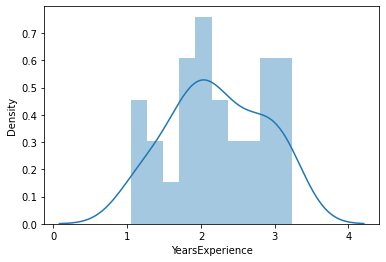

In [59]:
sns.distplot(np.sqrt(df['YearsExperience']), bins = 10)
plt.show()

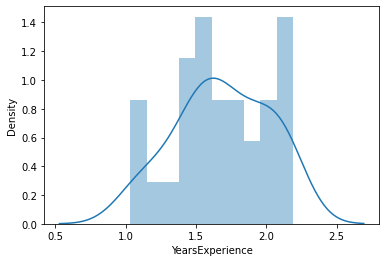

In [60]:
sns.distplot(np.cbrt(df['YearsExperience']), bins = 10)
plt.show()

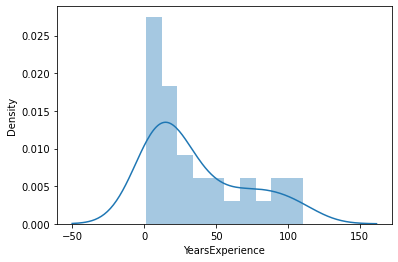

In [81]:
sns.distplot(np.square(df['YearsExperience']), bins = 10)
plt.show()

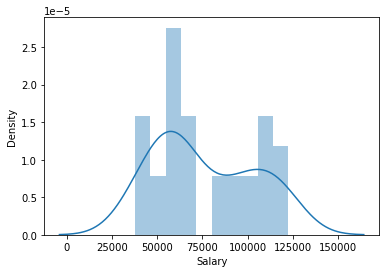

In [63]:
#  applying on Salary..
sns.distplot(df['Salary'], bins = 10)
plt.show()

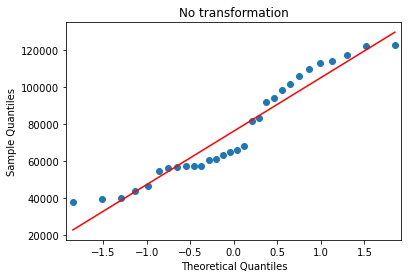

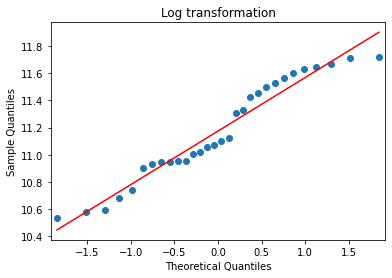

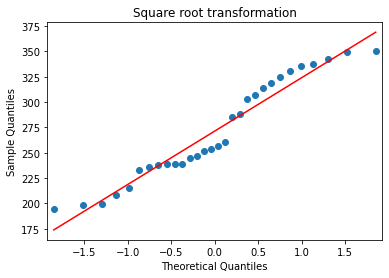

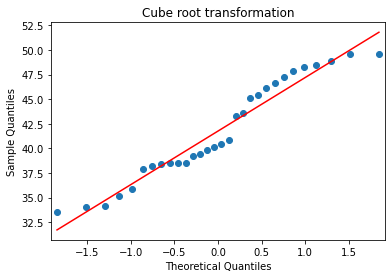

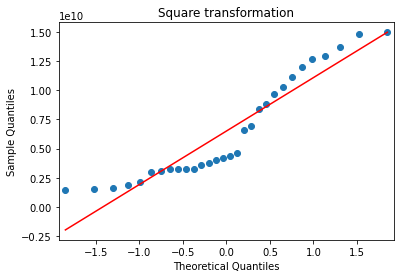

In [82]:
sm.qqplot(df['Salary'], line = 'r')
plt.title('No transformation')
sm.qqplot(np.log(df['Salary']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(df['Salary']), line = 'r')
plt.title('Square root transformation')
sm.qqplot(np.cbrt(df['Salary']), line = 'r')
plt.title('Cube root transformation')
sm.qqplot(np.square(df['Salary']), line = 'r')
plt.title('Square transformation')
plt.show()


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

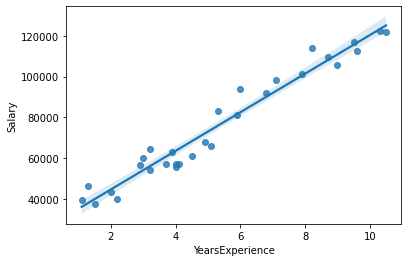

In [108]:
sns.regplot(x=df['YearsExperience'],y=df['Salary']) 

### Model Building

In [68]:
smodel=smf.ols("Salary~YearsExperience",data=df).fit()

In [69]:
smodel.rsquared,smodel.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

#### Applying Square Root

In [72]:
smodel1=smf.ols("np.sqrt(Salary)~np.sqrt(YearsExperience)",data=df).fit()

In [73]:
smodel1.rsquared,smodel1.rsquared_adj

(0.9419490138976825, 0.9398757643940283)

#### Applying Cube Root

In [74]:
smodel2=smf.ols("np.cbrt(Salary)~np.cbrt(YearsExperience)",data=df).fit()

In [75]:
smodel2.rsquared,smodel2.rsquared_adj

(0.9324434036761005, 0.9300306680931041)

#### Applying Log

In [76]:
smodel3=smf.ols("np.log(Salary)~np.log(YearsExperience)",data=df).fit()

In [77]:
smodel3.rsquared,smodel3.rsquared_adj

(0.9052150725817149, 0.9018298966024904)

#### applying Square

In [83]:
smodel4=smf.ols("np.square(Salary)~np.square(YearsExperience)",data=df).fit()

In [84]:
smodel4.rsquared,smodel4.rsquared_adj

(0.9540880842110778, 0.9524483729329021)

In [78]:
# smodel is giving the best accuracy

In [79]:
new_pred=smodel.predict(df["YearsExperience"])
new_pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [80]:
sal_pred=pd.DataFrame()
sal_pred["Salary"]=df["Salary"]
sal_pred["YearsExperience"]=df["YearsExperience"]
sal_pred["Prediction"]=new_pred
sal_pred

,Salary,YearsExperience,Prediction
0,39343.0,1.1,36187.158752
1,46205.0,1.3,38077.151217
2,37731.0,1.5,39967.143681
3,43525.0,2.0,44692.124842
4,39891.0,2.2,46582.117306
5,56642.0,2.9,53197.090931
6,60150.0,3.0,54142.087163
7,54445.0,3.2,56032.079627
8,64445.0,3.2,56032.079627
9,57189.0,3.7,60757.060788
